# Simulating Player Development using Elite Prospect Data
The NHL Draft selects the best 17-18 year old hockey players across the globe
with the goal to pick the players most likely to play in the NHL. Most players
don't arrive to the NHL in till their early 20s which leaves teams having to 
project what a player will be 4-5 years away. This project aims to model a
player's development through time given present information and estiamte the 
possible leagues and performance a player should expect in subsequent seasons. 


Before you start, change your working direction to ensure python has access to all the possible files

```
cd ./nhl_development_model/src/
```

Install necessary packages

```
pip install networkx

pip install matplotlib

pip install scipy

pip install pandas

pip install numpy

pip install joblib

pip install torch
```

The one package that causes difficulty is pygraphviz. Depending on your OS you need to get this package installed. I use MAC and was able to install using Brew package manager and installing pygraphviz doing the following:

```
brew install graphviz

pip install graphviz

pip install pygraphviz 
```

In [1]:
import generate_player_seasons as g

%matplotlib inline

`generate_player_seaons` is a python model that we will import to simulate a specifc U23 player

We are going to instantiate the module by invoking the `GeneratePlayer()` method 

In [2]:
sim = g.GeneratePlayer()

[14:56:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Next we're going to initialize our module by passing an Elite Prospects playerid to the method `initialize_player`

In [3]:
sim.initialize_player('512832') # Vasili Podkolzin playerid from eliteprospects.com

After initlizing the player we're reading to simulate a player's development. The `simulate_player_development` method takes the most recent player season (y) and begins by predicting what leagues that player is most likely to play in next year (y+1). Knowing what league a player plays in we can now estimate player performance based on the current season and league in y+1 to get an estiamte of performance in y+1. This process is executed recursively for every predicted league a player is likely to play and stops when they reach 23. 

In [4]:
sim.simulate_player_development()

--- Simulating Seasons --- Vasili Podkolzin --- Age: 19
--- Simulation Complete --- Vasili Podkolzin --- Age: 20
--- Simulating Seasons --- Vasili Podkolzin --- Age: 20
--- Simulation Complete --- Vasili Podkolzin --- Age: 20
--- Simulating Seasons --- Vasili Podkolzin --- Age: 21
--- Simulating Seasons --- Vasili Podkolzin --- Age: 21
--- Simulation Complete --- Vasili Podkolzin --- Age: 21
--- Simulating Seasons --- Vasili Podkolzin --- Age: 22
--- Simulating Seasons --- Vasili Podkolzin --- Age: 22
--- Simulation Complete --- Vasili Podkolzin --- Age: 22


Since each season creates n possibilities (limited to 3 per season) of league seasons, we can create a network graph that sequentially connects nodes (player seasons) based on which simualted season they originate from. Invoking the `generate_network_graph` method generates that network graph as well as conditional probabilities and expected points at each node.

In [5]:
sim.generate_network_graph()

With a NetworkX Directed Graph created from our original player season, we can visualize this as a tree diagram and see what a player's likely player development path will take, and perhaps what the optimal path is to maximize NHL production

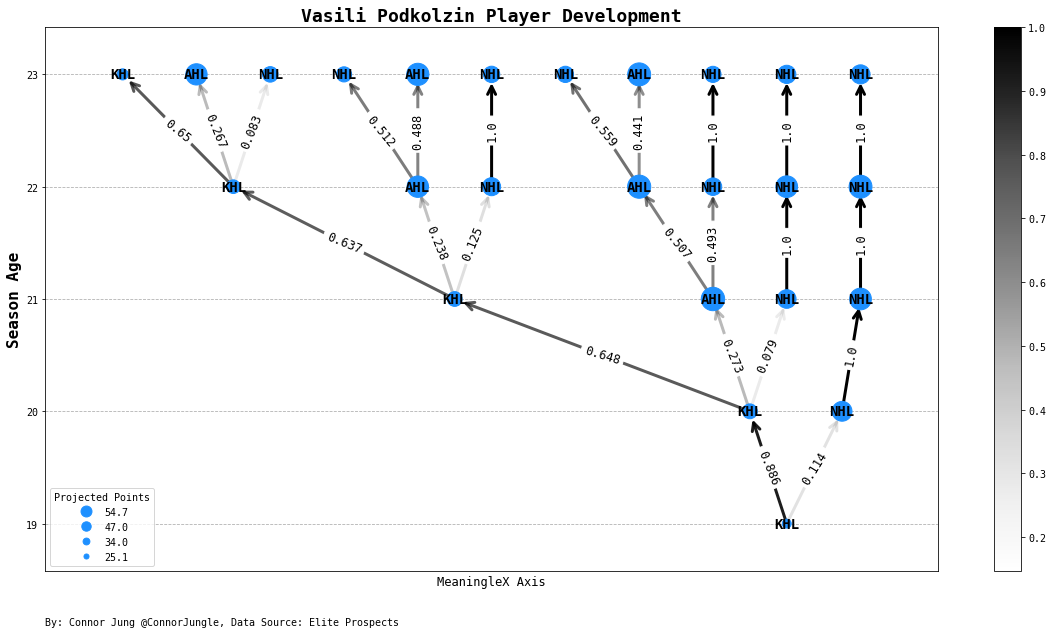

In [6]:
sim.plot_network_graph()